In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Flatten 28x28 -> 784
X_train = X_train.reshape(60000, 784).astype("float32")
X_test  = X_test.reshape(10000, 784).astype("float32")

# 3. Normalisation [0,1]
X_train /= 255.0
X_test  /= 255.0

# 4. One-hot encoding
Y_train = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")


X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential(name="logistic_regression_mnist")
model.add(Dense(10, input_dim=784, name="fc1"))
model.add(Activation("softmax"))

model.summary()


/home/ubuntu/Videos/TP2_US3362_deep_keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1770233777.903098  517456 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1770233777.933610  517456 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "logistic_regression_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

learning_rate = 0.1
sgd = SGD(learning_rate=learning_rate)

model.compile(
    loss="categorical_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)

batch_size = 100
nb_epoch = 20

# one-hot encoding
Y_train = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

history = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1
)


Epoch 1/20


2026-02-04 20:38:04.057367: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8624 - loss: 0.5393
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8998 - loss: 0.3605
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9068 - loss: 0.3323
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9110 - loss: 0.3173
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.3078
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9157 - loss: 0.3008
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9176 - loss: 0.2957
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2913
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2879
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2849
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2821
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [5]:
scores = model.evaluate(X_test, Y_test, verbose=0)

print("Test loss: %.4f" % scores[0])
print("Test accuracy: %.2f%%" % (scores[1] * 100))


2026-02-04 20:38:34.413824: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


Test loss: 0.2716
Test accuracy: 92.44%


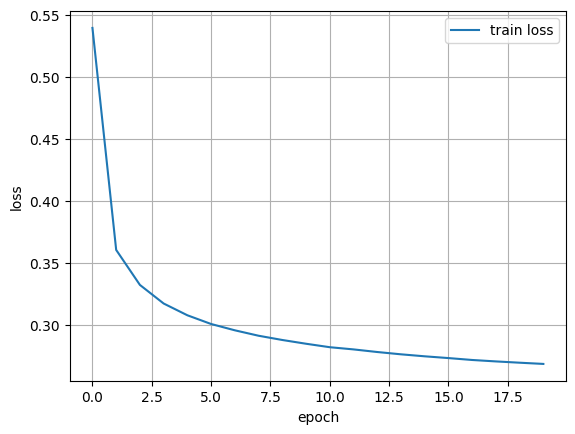

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model_mlp = Sequential(name="mlp_1hidden_mnist")

# Couche cachée
model_mlp.add(Dense(100, input_dim=784, name="fc1"))
model_mlp.add(Activation("sigmoid"))

# Couche de sortie
model_mlp.add(Dense(10, name="fc2"))
model_mlp.add(Activation("softmax"))

model_mlp.summary()


Model: "mlp_1hidden_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
layer1 = model_mlp.get_layer("fc1")
layer2 = model_mlp.get_layer("fc2")

print("fc1 kernel init:", layer1.kernel_initializer)
print("fc1 bias init  :", layer1.bias_initializer)
print("fc2 kernel init:", layer2.kernel_initializer)
print("fc2 bias init  :", layer2.bias_initializer)


fc1 kernel init: <keras.src.initializers.random_initializers.GlorotUniform object at 0x7f9fb64db970>
fc1 bias init  : <keras.src.initializers.constant_initializers.Zeros object at 0x7f9f8c7ecbe0>
fc2 kernel init: <keras.src.initializers.random_initializers.GlorotUniform object at 0x7f9f8c7eee00>
fc2 bias init  : <keras.src.initializers.constant_initializers.Zeros object at 0x7f9f8c7eee60>


In [8]:
expected_params = (784*100 + 100) + (100*10 + 10)
print("Expected total params =", expected_params)
print("Keras total params    =", model_mlp.count_params())


Expected total params = 79510
Keras total params    = 79510


In [9]:
from tensorflow.keras.optimizers import SGD

learning_rate = 0.1
sgd = SGD(learning_rate=learning_rate)

model_mlp.compile(
    loss="categorical_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)

batch_size = 100
nb_epoch = 20

history_mlp = model_mlp.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(X_test, Y_test)
)


Epoch 1/20


2026-02-04 20:41:52.277111: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 1.3426

2026-02-04 20:41:54.710689: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8006 - loss: 0.8858 - val_accuracy: 0.8887 - val_loss: 0.4551
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8920 - loss: 0.4084 - val_accuracy: 0.9051 - val_loss: 0.3500
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9043 - loss: 0.3433 - val_accuracy: 0.9130 - val_loss: 0.3122
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9110 - loss: 0.3122 - val_accuracy: 0.9183 - val_loss: 0.2899
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9164 - loss: 0.2924 - val_accuracy: 0.9218 - val_loss: 0.2775
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9202 - loss: 0.2769 - val_accuracy: 0.9261 - val_loss: 0.2614
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9244 - loss: 0.2635 - val_accuracy: 0.9300 - val_loss: 0.2501
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9275 - loss: 0.2516 - val_accuracy: 0.9329 - val_

In [10]:
scores = model_mlp.evaluate(X_test, Y_test, verbose=0)
print("Test loss: %.4f" % scores[0])
print("Test accuracy: %.2f%%" % (scores[1]*100))


2026-02-04 20:43:33.072578: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


Test loss: 0.1623
Test accuracy: 95.32%


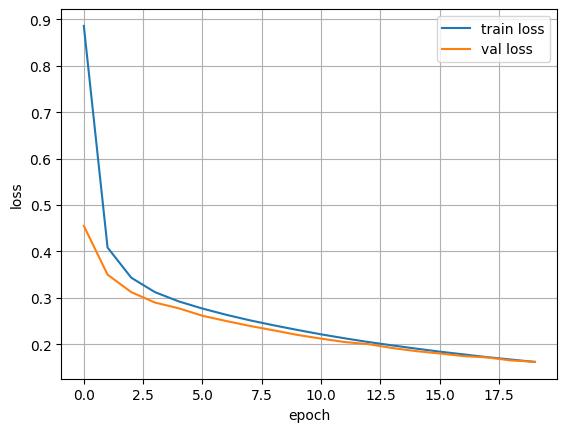

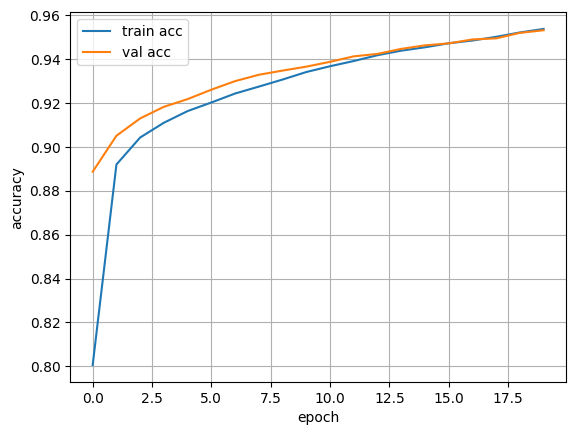

In [11]:
import os
import matplotlib.pyplot as plt

os.makedirs("figures", exist_ok=True)

plt.figure()
plt.plot(history_mlp.history["loss"], label="train loss")
plt.plot(history_mlp.history["val_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("loss")
plt.grid(True); plt.legend()
plt.savefig("figures/exo2_mlp_loss.png", dpi=150, bbox_inches="tight")
plt.show()

plt.figure()
plt.plot(history_mlp.history["accuracy"], label="train acc")
plt.plot(history_mlp.history["val_accuracy"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy")
plt.grid(True); plt.legend()
plt.savefig("figures/exo2_mlp_accuracy.png", dpi=150, bbox_inches="tight")
plt.show()


In [13]:
import os
os.makedirs("models", exist_ok=True)

def saveModelJSON(model, savename):
    model_json = model.to_json()
    with open(savename + ".json", "w") as f:
        f.write(model_json)
    print("Model", savename + ".json saved")

    model.save_weights(savename + ".weights.h5")
    print("Weights", savename + ".weights.h5 saved")

saveModelJSON(model_mlp, "models/mlp_mnist")


Model models/mlp_mnist.json saved
Weights models/mlp_mnist.weights.h5 saved


In [15]:
import os, time
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

os.makedirs("figures", exist_ok=True)
os.makedirs("models", exist_ok=True)

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape for ConvNet: (N, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255.0
input_shape = (28, 28, 1)

# One-hot
Y_train = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

print("x_train:", x_train.shape, "Y_train:", Y_train.shape)
print("x_test :", x_test.shape,  "Y_test :", Y_test.shape)


x_train: (60000, 28, 28, 1) Y_train: (60000, 10)
x_test : (10000, 28, 28, 1) Y_test : (10000, 10)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

model_cnn = Sequential(name="lenet_like_mnist")

# Bloc 1: Conv(16,5x5) + ReLU + MaxPool(2x2)
model_cnn.add(Conv2D(16, kernel_size=(5,5), padding="valid", input_shape=input_shape, name="conv1"))
model_cnn.add(Activation("relu", name="relu1"))
model_cnn.add(MaxPooling2D(pool_size=(2,2), name="pool1"))

# Bloc 2: Conv(32,5x5) + ReLU + MaxPool(2x2)
model_cnn.add(Conv2D(32, kernel_size=(5,5), padding="valid", name="conv2"))
model_cnn.add(Activation("relu", name="relu2"))
model_cnn.add(MaxPooling2D(pool_size=(2,2), name="pool2"))

# Flatten -> Dense(100) + Sigmoid -> Dense(10) + Softmax
model_cnn.add(Flatten(name="flatten"))
model_cnn.add(Dense(100, name="fc1"))
model_cnn.add(Activation("sigmoid", name="sigmoid1"))
model_cnn.add(Dense(10, name="fc2"))
model_cnn.add(Activation("softmax", name="softmax"))

model_cnn.summary()


/home/ubuntu/Videos/TP2_US3362_deep_keras/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "lenet_like_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 8, 8, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sigmoid1 (Activation)           │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,558 (256.09 KB)

 Trainable params: 65,558 (256.09 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

class EpochTimer(Callback):
    def on_train_begin(self, logs=None):
        self.epoch_times = []
    def on_epoch_begin(self, epoch, logs=None):
        self.t0 = time.time()
    def on_epoch_end(self, epoch, logs=None):
        self.epoch_times.append(time.time() - self.t0)

learning_rate = 0.1
sgd = SGD(learning_rate=learning_rate)

model_cnn.compile(
    loss="categorical_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)

timer = EpochTimer()


In [21]:
batch_size = 100
nb_epoch = 20

history_cnn = model_cnn.fit(
    x_train, Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(x_test, Y_test),
    callbacks=[timer]
)

avg_epoch_time = float(np.mean(timer.epoch_times))
print(f"\nTemps moyen par époque: {avg_epoch_time:.3f} s/epoch")


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8482 - loss: 0.5261 - val_accuracy: 0.9590 - val_loss: 0.1545
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9630 - loss: 0.1328 - val_accuracy: 0.9744 - val_loss: 0.0916
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9741 - loss: 0.0922 - val_accuracy: 0.9791 - val_loss: 0.0718
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9788 - loss: 0.0739 - val_accuracy: 0.9824 - val_loss: 0.0621
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9824 - loss: 0.0626 - val_accuracy: 0.9839 - val_loss: 0.0531
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9847 - loss: 0.0546 - val_accuracy: 0.9847 - val_loss: 0.0491
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9863 - loss: 0.0483 - val_accuracy: 0.9855 - val_loss: 0.0483
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9875 - loss: 0.0440 - 

In [22]:
scores = model_cnn.evaluate(x_test, Y_test, verbose=0)
print("Test loss: %.4f" % scores[0])
print("Test accuracy: %.2f%%" % (scores[1]*100))


Test loss: 0.0319
Test accuracy: 99.00%


In [24]:
import os
print("CWD =", os.getcwd())
print("figures exists here ?", os.path.isdir("figures"))


CWD = /home/ubuntu/Videos/TP2_US3362_deep_keras/notebooks
figures exists here ? False


In [25]:
import os
# Remplace par le chemin du projet si tu le connais
PROJECT_DIR = "/home/ubuntu/Videos/TP2_US3362_deep_keras"
print("Project dir exists ?", os.path.isdir(PROJECT_DIR))
print("figures in project ?", os.path.isdir(os.path.join(PROJECT_DIR, "figures")))


Project dir exists ? True
figures in project ? True


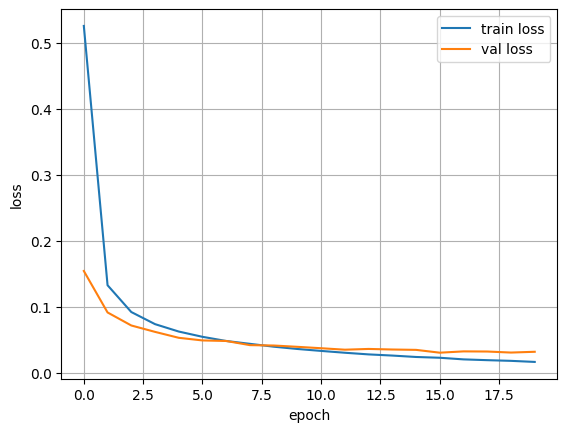

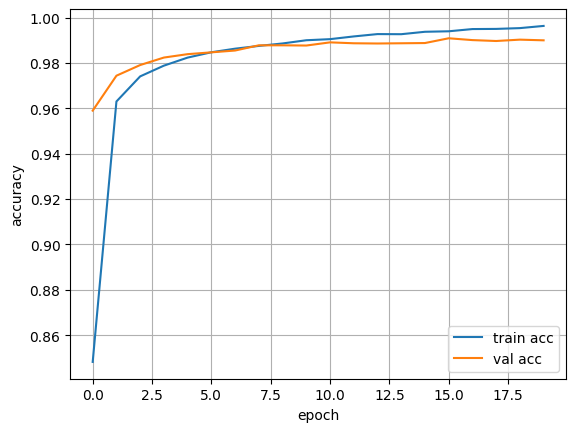

✅ Saved figures:
 - /home/ubuntu/Videos/TP2_US3362_deep_keras/figures/exo3_cnn_loss.png
 - /home/ubuntu/Videos/TP2_US3362_deep_keras/figures/exo3_cnn_accuracy.png


In [26]:
import os
import matplotlib.pyplot as plt

# Chemins FIXES vers ton projet
PROJECT_DIR = "/home/ubuntu/Videos/TP2_US3362_deep_keras"
FIG_DIR = os.path.join(PROJECT_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

loss_path = os.path.join(FIG_DIR, "exo3_cnn_loss.png")
acc_path  = os.path.join(FIG_DIR, "exo3_cnn_accuracy.png")

# -------- LOSS --------
plt.figure()
plt.plot(history_cnn.history["loss"], label="train loss")
plt.plot(history_cnn.history["val_loss"], label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.savefig(loss_path, dpi=150, bbox_inches="tight")
plt.show()

# -------- ACCURACY --------
plt.figure()
plt.plot(history_cnn.history["accuracy"], label="train acc")
plt.plot(history_cnn.history["val_accuracy"], label="val acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.savefig(acc_path, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Saved figures:")
print(" -", loss_path)
print(" -", acc_path)


In [27]:
import os

PROJECT_DIR = "/home/ubuntu/Videos/TP2_US3362_deep_keras"
MODELS_DIR = os.path.join(PROJECT_DIR, "models")
os.makedirs(MODELS_DIR, exist_ok=True)

model_path = os.path.join(MODELS_DIR, "exo3_lenet_like_mnist.keras")
model_cnn.save(model_path)

print("✅ Model saved to:", model_path)


✅ Model saved to: /home/ubuntu/Videos/TP2_US3362_deep_keras/models/exo3_lenet_like_mnist.keras


In [28]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE


In [29]:
(_, _), (x_test, y_test) = mnist.load_data()

X_test = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255.0
labels = y_test.astype(int)

print("X_test:", X_test.shape, "labels:", labels.shape)


X_test: (10000, 784) labels: (10000,)


In [30]:
n = 1000  # mets 10000 plus tard si tu veux tout le test
X = X_test[:n]
y = labels[:n]

print("Subset:", X.shape, y.shape)


Subset: (1000, 784) (1000,)


In [31]:
tsne = TSNE(
    n_components=2,
    init="pca",
    perplexity=30,
    verbose=2,
    random_state=42
)

X_2d = tsne.fit_transform(X)
print("X_2d:", X_2d.shape)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.547940
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 69.3690338, gradient norm = 0.0000044 (50 iterations in 0.231s)
[t-SNE] Iteration 100: error = 69.3690262, gradient norm = 0.0000146 (50 iterations in 0.172s)
[t-SNE] Iteration 150: error = 69.3689651, gradient norm = 0.0000718 (50 iterations in 0.143s)
[t-SNE] Iteration 200: error = 69.3685303, gradient norm = 0.0001271 (50 iterations in 0.180s)
[t-SNE] Iteration 250: error = 69.3651505, gradient norm = 0.0003006 (50 iterations in 0.157s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.365150
[t-SNE] Iteration 300: error = 1.3977509, gradient norm = 0.0169211 (50 iterations in 0.155s)
[t-SNE] Iteration 350: error = 1.1716661, gradient norm = 0.01177

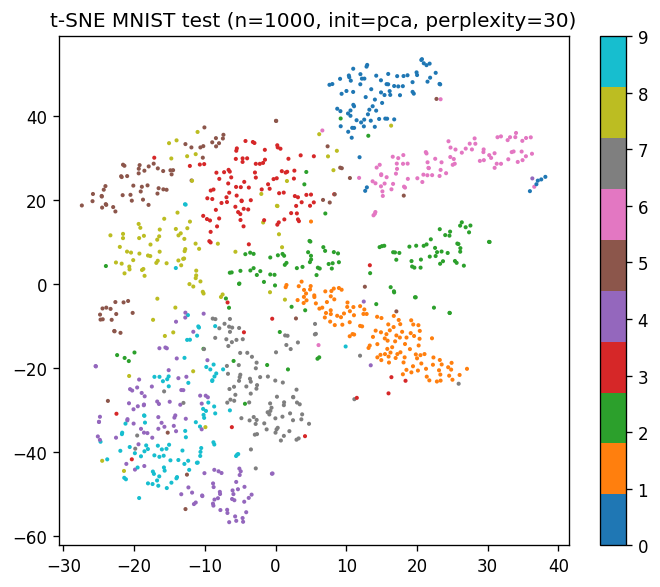

✅ Saved: /home/ubuntu/Videos/TP2_US3362_deep_keras/figures/exo4_tsne_raw.png


In [32]:
import os

PROJECT_DIR = "/home/ubuntu/Videos/TP2_US3362_deep_keras"   # adapte si besoin
FIG_DIR = os.path.join(PROJECT_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

out_png = os.path.join(FIG_DIR, "exo4_tsne_raw.png")

plt.figure(figsize=(6,5), dpi=120)
sc = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, s=6, cmap="tab10", edgecolors="none")
plt.colorbar(sc, ticks=range(10))
plt.title(f"t-SNE MNIST test (n={n}, init=pca, perplexity=30)")
plt.tight_layout()

plt.savefig(out_png, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Saved:", out_png)


In [33]:
n = 10000
X = X_test[:n]
y = labels[:n]

X_2d = tsne.fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 2.900s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030841
[t-SNE] Computed conditional probabilities in 0.340s
[t-SNE] Iteration 50: error = 90.7585144, gradient norm = 0.0117996 (50 iterations in 2.468s)
[t-SNE] It

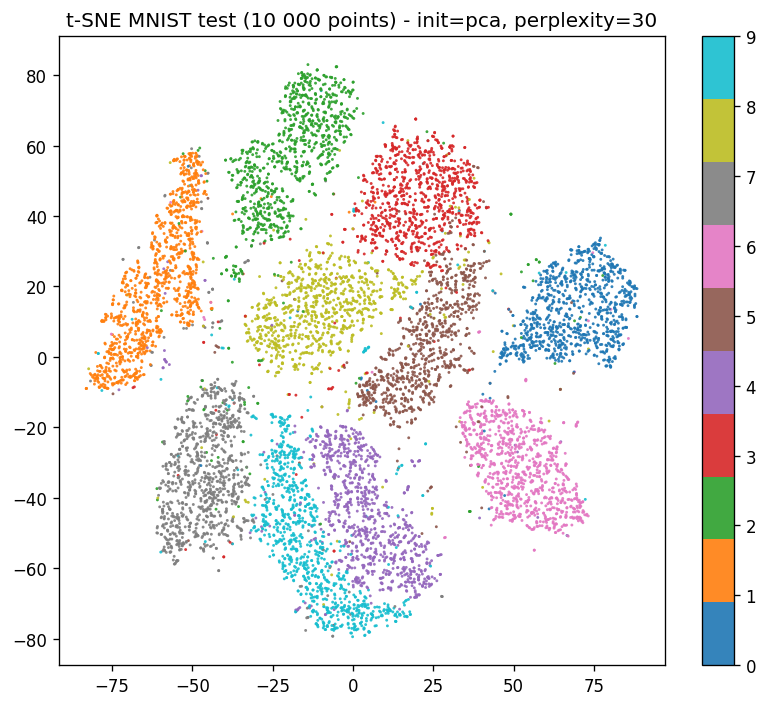

✅ Saved: /home/ubuntu/Videos/TP2_US3362_deep_keras/figures/exo4_tsne_raw_fulltest_10000.png


In [34]:
PROJECT_DIR = "/home/ubuntu/Videos/TP2_US3362_deep_keras"  # adapte si besoin
FIG_DIR = os.path.join(PROJECT_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

out_png = os.path.join(FIG_DIR, "exo4_tsne_raw_fulltest_10000.png")

plt.figure(figsize=(7,6), dpi=120)
sc = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=3, cmap="tab10", edgecolors="none", alpha=0.9)
plt.colorbar(sc, ticks=range(10))
plt.title("t-SNE MNIST test (10 000 points) - init=pca, perplexity=30")
plt.tight_layout()

plt.savefig(out_png, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Saved:", out_png)


In [40]:
import os, time
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.spatial import ConvexHull
from sklearn.mixture import GaussianMixture
from scipy import linalg
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from tensorflow.keras.datasets import mnist

# Chemin projet (option 1 : dossier du notebook)
PROJECT_DIR = os.getcwd()

# Si ton notebook est dans un sous-dossier, tu peux forcer le projet :
# PROJECT_DIR = "/home/ubuntu/Videos/TP2_US3362_deep_keras"

FIG_DIR = os.path.join(PROJECT_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

print("PROJECT_DIR:", PROJECT_DIR)
print("FIG_DIR     :", FIG_DIR)


PROJECT_DIR: /home/ubuntu/Videos/TP2_US3362_deep_keras/notebooks
FIG_DIR     : /home/ubuntu/Videos/TP2_US3362_deep_keras/notebooks/figures


In [41]:
def convexHulls(points, labels):
    convex_hulls = []
    for i in range(10):
        pts = points[labels == i, :]
        convex_hulls.append(ConvexHull(pts))
    return convex_hulls


def best_ellipses(points, labels):
    gaussians = []
    for i in range(10):
        pts = points[labels == i, :]
        gaussians.append(
            GaussianMixture(n_components=1, covariance_type="full", random_state=0).fit(pts)
        )
    return gaussians


def neighboring_hit(points, labels, k=6):
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm="ball_tree").fit(points)
    distances, indices = nbrs.kneighbors(points)

    txs = 0.0
    txsc = [0.0]*10
    nppts = [0.0]*10

    for i in range(len(points)):
        tx = 0.0
        for j in range(1, k+1):  # ignore j=0 (self)
            if labels[indices[i, j]] == labels[i]:
                tx += 1
        tx /= k

        txsc[labels[i]] += tx
        nppts[labels[i]] += 1
        txs += tx

    for c in range(10):
        if nppts[c] > 0:
            txsc[c] /= nppts[c]

    return txs / len(points), txsc


In [ ]:
def visualization(points2D, labels, convex_hulls, ellipses, projname, nh, out_png):
    cmap = cm.tab10
    vals = [i/10.0 for i in range(10)]
    points2D_c = [points2D[labels == i, :] for i in range(10)]

    plt.figure(figsize=(6, 12), dpi=120)
    plt.subplots_adjust(hspace=0.35)

    # 1) Scatter
    ax1 = plt.subplot(311)
    sc = ax1.scatter(points2D[:,0], points2D[:,1], c=labels, s=4, edgecolors="none",
                     cmap=cmap, alpha=0.9)
    plt.colorbar(sc, ax=ax1, ticks=range(10))
    ax1.set_title(f"2D {projname} - NH = {nh*100:.2f}%")
    ax1.set_xticks([]); ax1.set_yticks([])

    # 2) Convex hulls
    ax2 = plt.subplot(312)
    for i in range(10):
        ch = np.append(convex_hulls[i].vertices, convex_hulls[i].vertices[0])
        ax2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], "-",
                 color=cmap(vals[i]), linewidth=2)
    ax2.set_title(f"{projname} - Convex Hulls")
    ax2.set_xticks([]); ax2.set_yticks([])

    # 3) Ellipses (Gaussian)
    ax3 = plt.subplot(313)
    for i in range(10):
        X = points2D[labels == i, :]
        gm = ellipses[i]
        mean = gm.means_[0]
        cov = gm.covariances_[0]

        v, w = linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])

        angle = np.arctan2(u[1], u[0]) * 180.0 / np.pi

        ax3.scatter(X[:,0], X[:,1], s=3, alpha=0.15, color=cmap(vals[i]))
        ell = mpl.patches.Ellipse(
                                        xy=mean, width=v[0], height=v[1],
                                        angle=180.0 + angle,
                                        color=cmap(vals[i]), alpha=0.35
                                    )

        ax3.add_patch(ell)

    ax3.set_title(f"{projname} - Best fitting ellipses (GMM)")
    ax3.set_xticks([]); ax3.set_yticks([])

    plt.savefig(out_png, dpi=150, bbox_inches="tight")
    plt.show()
    print("✅ Saved:", out_png)


In [43]:
(_, _), (x_test, y_test) = mnist.load_data()

X_test = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255.0
labels = y_test.astype(int)

print("X_test:", X_test.shape, "labels:", labels.shape)


X_test: (10000, 784) labels: (10000,)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 2.249s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030841
[t-SNE] Computed conditional probabilities in 0.304s
[t-SNE] Iteration 50: error = 90.7585144, gradient norm = 0.0117996 (50 iterations in 2.232s)
[t-SNE] It

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

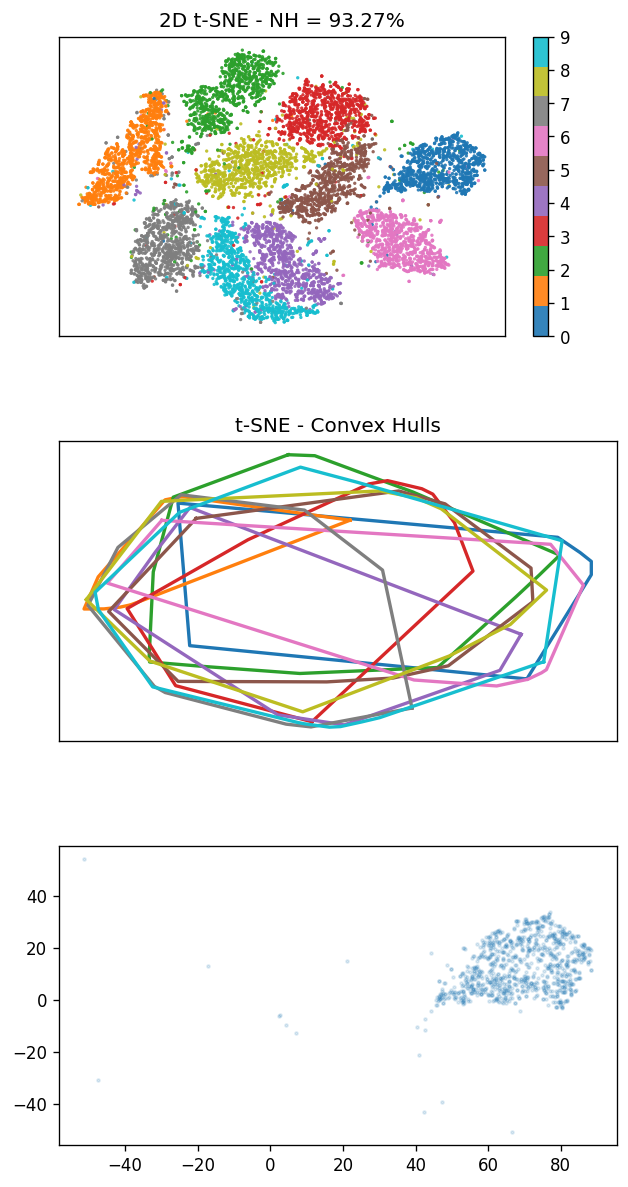

In [44]:
n = 10000  # tu peux mettre 5000 si ça passe, 10000 est long
X_sub = X_test[:n]
labels_sub = labels[:n]

tsne = TSNE(n_components=2, init="pca", perplexity=30, verbose=2, random_state=42)

t0 = time.time()
x2d_tsne = tsne.fit_transform(X_sub)
print("t-SNE time:", round(time.time() - t0, 2), "s")

conv_tsne = convexHulls(x2d_tsne, labels_sub)
ell_tsne  = best_ellipses(x2d_tsne, labels_sub)
nh_tsne, nh_tsne_by_class = neighboring_hit(x2d_tsne, labels_sub, k=6)

out_tsne = os.path.join(FIG_DIR, "exo4_tsne.png")
visualization(x2d_tsne, labels_sub, conv_tsne, ell_tsne, "t-SNE", nh_tsne, out_tsne)

print("NH global t-SNE:", nh_tsne)
print("NH per class t-SNE:", np.round(nh_tsne_by_class, 3))


In [ ]:
pca = PCA(n_components=2, random_state=42)

t0 = time.time()
x2d_pca = pca.fit_transform(X_test)
print("PCA time:", round(time.time() - t0, 2), "s")

conv_pca = convexHulls(x2d_pca, labels)
ell_pca  = best_ellipses(x2d_pca, labels)
nh_pca, nh_pca_by_class = neighboring_hit(x2d_pca, labels, k=6)

out_pca = os.path.join(FIG_DIR, "exo4_pca.png")
visualization(x2d_pca, labels, conv_pca, ell_pca, "PCA", nh_pca, out_pca)

print("NH global PCA:", nh_pca)
print("NH per class PCA:", np.round(nh_pca_by_class, 3))
